## Zajacz and Tsay also include calculations of older models in the supporting data 1
- We use this to benchmark our codes for these models

In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump
import pickle
import PySulfSat as ss

In [2]:
df=ss.import_data('Zajacz_other_models.xlsx',
                  sheet_name='PySulfSat')

We have replaced all missing liquid oxides and strings with zeros. 


In [3]:
conv=ss.convert_fo2_to_fe_partition(liq_comps=df, T_K=df['T_K'],
                            P_kbar=df['P_kbar'],
                 model="Kress1991", fo2=10**(df['logfO2']))

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\core_calcs.py:664: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


In [4]:
Fe3Fet_Liq=conv['Fe3Fet_Liq'].fillna(0)

In [5]:
df['FeO_Liq']=df['FeOt_Liq']*(1-Fe3Fet_Liq)
df['Fe2O3_Liq']=df['FeOt_Liq']*(Fe3Fet_Liq)*1.1111
df_noFet=df.drop(columns='FeOt_Liq')

In [6]:

an_mol_frac=ss.calculate_anhydrous_mol_fractions_liquid(liq_comps=df)

In [7]:
mol_frac=ss.calculate_hydrous_mol_fractions_liquid_redox(liq_comps=df_noFet)
#mol_frac=ss.calculate_hydrous_mol_fractions_liquid(liq_comps=df)

In [8]:
cat_frac=ss.calculate_hydrous_cat_fractions_liquid_redox(liq_comps=df_noFet)
cat_prop=ss.calculate_hydrous_cat_proportions_liquid_redox(liq_comps=df_noFet)

# Li and Ripley (2009)
- Need to convert from mol fraction back to ppm...
- HAve emailed to see if hydrous or anhydrous fractions

In [9]:
T_K=df['T_K']
P_kbar=df['P_kbar']
Fe3Fet_Liq=0
lnXSCSS=(-1.76 -0.474*(10**4/T_K)
-0.021*P_kbar +5.559* mol_frac['FeO_Liq_mol_frac']*(1-Fe3Fet_Liq)
+2.5659* mol_frac['TiO2_Liq_mol_frac']
+2.709*mol_frac['CaO_Liq_mol_frac']
-3.192*mol_frac['SiO2_Liq_mol_frac']  
-3.049*mol_frac['H2O_Liq_mol_frac'])


## Baker and Moretti 

In [10]:

MFM=(cat_frac['Na_Liq_cat_frac']+cat_frac['K_Liq_cat_frac']
     +2*(cat_frac['Ca_Liq_cat_frac']+cat_frac['Mg_Liq_cat_frac']
         +cat_frac['Fe2_Liq_cat_frac'])/(cat_frac['Si_Liq_cat_frac']*
        (cat_frac['Al_Liq_cat_frac']+cat_frac['Fe3_Liq_cat_frac'])))
lnS=(23.53502 - 19073.8/T_K + 4055.8*(P_kbar/10)/T_K
     +0.82637*np.log(MFM) -0.79932*MFM*mol_frac['H2O_Liq_mol_frac']
     +0.81241*np.log(mol_frac['H2O_Liq_mol_frac'])
     -0.21087*np.log(mol_frac['CaO_Liq_mol_frac']))
S=np.exp(lnS)

In [11]:
S

0      1.048068e+04
1      1.539915e+04
2      2.412861e+04
3      8.931346e+03
4      7.652691e+03
           ...     
188    2.027492e+05
189    1.047814e+03
190    1.158212e+07
191    1.055559e+07
192    9.288889e+06
Length: 193, dtype: float64

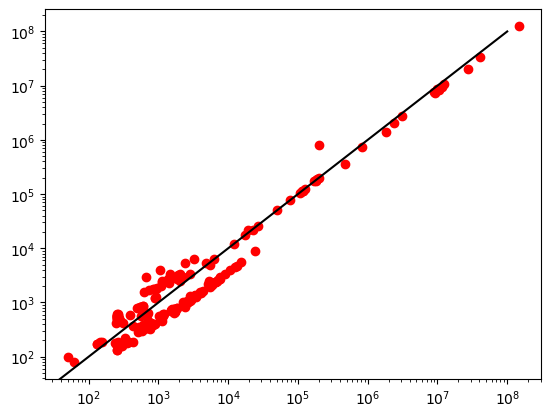

In [12]:
plt.plot(S, df['Baker_Moretti'], 'or')
plt.plot([0, 100000000], [0, 100000000], '-k')
plt.yscale('log')
plt.xscale('log')